<a href="https://colab.research.google.com/github/armandovl/youtube/blob/main/Funci%C3%B3n_para_Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
#importamos el data frame
titanic=sns.load_dataset("titanic")

In [2]:
titanic.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


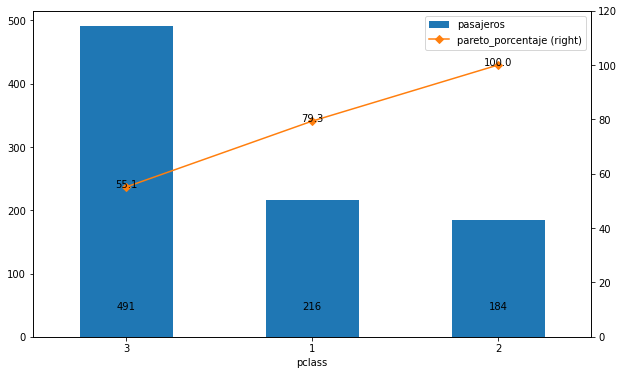


 Tabla de Frecuencias Acumuladas
col_0   pasajeros  pareto_porcentaje
pclass                              
3             491               55.1
1             216               79.3
2             184              100.0


In [10]:
pareto(titanic,"pclass","pasajeros")

In [8]:
def pareto(nombreDataFrame,nombreColumna,nombreNuevoColumna):

  #importamos biblitecas necesarias
  import pandas as pd
  import matplotlib.pyplot as plt

  nombreDataFrame[nombreColumna]=pd.Categorical(nombreDataFrame[nombreColumna]) #categorizar la columna

  tab_pareto=pd.crosstab(index=nombreDataFrame[nombreColumna], columns=nombreNuevoColumna) #hacemos tabla de frecuencia de columna
  tab_pareto = tab_pareto.sort_values(by=nombreNuevoColumna,ascending=False) #ordenamos la tabla de frecuencias en orden descendente 
  tab_pareto['pareto_porcentaje'] = 100 *tab_pareto[nombreNuevoColumna].cumsum() / tab_pareto[nombreNuevoColumna].sum() #agregamos columna con porcentaje acumulado
  
  #construimos la gráfica
  fig, axes = plt.subplots(figsize=(8,6)) #tamaño de la figura figsize= x,y 
  ax1 = tab_pareto.plot(use_index=True, y=nombreNuevoColumna,  kind='bar', ax=axes) #agregamos gráfico de barras
  ax2 = tab_pareto.plot(use_index=True, y='pareto_porcentaje', marker='D', color="C1", kind='line', ax=axes, secondary_y=True) #agregamos gráfico de porcentaje
  ax2.set_ylim([0,140]) #le ponemos un limite al eje y de 140

  #anotar los paretos
  words = list(tab_pareto.pareto_porcentaje.round(1)) #crear una lista con los vaores de pareto
  for i, word in enumerate(words): #hacer un for para agregar cada etiqueta pareto
      plt.annotate(word, xy=(i,tab_pareto['pareto_porcentaje'][i]),ha="center")

  #anotar losvalores barras
  words = list(tab_pareto[nombreNuevoColumna])
  for i, word in enumerate(words):
      plt.annotate(word, xy=(i,10),ha="center")

  plt.show()#imprimir gráfico
  print("\n Tabla de Frecuencias Acumuladas")
  print(tab_pareto.round(1)) #imprimimos la tabla con un decimal en los porcentajes